## Various ways of detecting jellyfish galaxies

In [1]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sim_name = 'RefL0100N1504'
con = sql.connect("nkl161", password="FCGxrt20")

### Finding the radial distance from center

In [3]:
jellyfish_ID = [9542933, 10694572, 11556600, 12143703, 12681787, 
                12728081, 13681352, 17929826]

In [4]:
# # Initialize empty list
jellyfish_data = {}

# Define SQL query
for i in range(len(jellyfish_ID)):
    ID = jellyfish_ID[i]
    print(ID)
    jellyfish_query = """
    SELECT
        sub.GalaxyID as galID,
        sub.MassType_Star as StellarMass,
        sub.StarFormationRate as SFR,
        SQRT(SQUARE(fof.GroupCentreOfPotential_x - sub.CentreOfPotential_x)
        +SQUARE(fof.GroupCentreOfPotential_y - sub.CentreOfPotential_y)
        +SQUARE(fof.GroupCentreOfPotential_z - sub.CentreOfPotential_z))
        as Distance
    FROM
        %s_SubHalo as sub,
        %s_FOF as fof,
        %s_Aperture as ap
    WHERE
        sub.GroupID = fof.GroupID and
        sub.GalaxyID = %d and
        ap.GalaxyID = sub.GalaxyID and
        ap.ApertureSize = 30
    """%(sim_name, sim_name, sim_name, ID)
    
    # Execute query
    jellyData = sql.execute_query(con, jellyfish_query)
    print(jellyData)
    jellyfish_data[i] = (jellyData)

9542933
(9542933, 3.0804038e+10, 4.937533, 0.5203387)
10694572
(10694572, 2.6647065e+10, 2.8390713, 0.38512293)
11556600
(11556600, 3.3720777e+10, 2.8725297, 0.38933987)
12143703
(12143703, 3.345583e+10, 1.6788048, 0.43413076)
12681787
(12681787, 1.7164811e+10, 1.3004584, 0.71767794)
12728081
(12728081, 2.0809146e+10, 2.204082, 0.13398106)
13681352
(13681352, 2.9966457e+10, 4.1530795, 1.03856945)
17929826
(17929826, 1.795217e+10, 0.29144388, 0.08429835)


The output is a dictionary. You can add the query output to an empty dictionary as above, specifying that it is taking the ith row. You can then call the ith entry and the specific label (e.g. dictionary[i]['mass']), but not the index (e.g. dictionary[i][0]).

In [29]:
mass = []
sfr = []
distance = []
for i in range(len(jellyfish_data)):
    mass.append(jellyfish_data[i]['StellarMass'])
    sfr.append(jellyfish_data[i]['SFR'])
    distance.append(jellyfish_data[i]['Distance'])

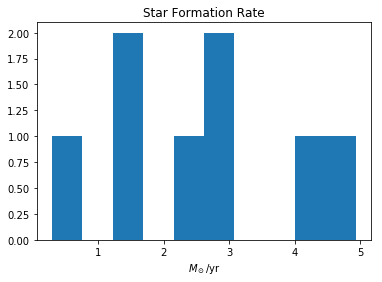

In [36]:
plt.hist(sfr, bins=10)
plt.title('Star Formation Rate')
plt.xlabel('$M_\odot$/yr')
plt.show()

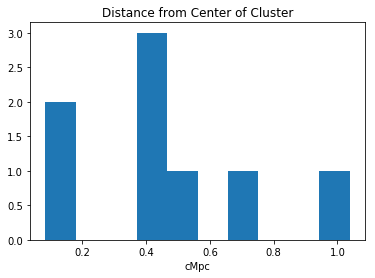

In [35]:
plt.hist(distance)
plt.title('Distance from Center of Cluster')
plt.xlabel('cMpc')
plt.show()

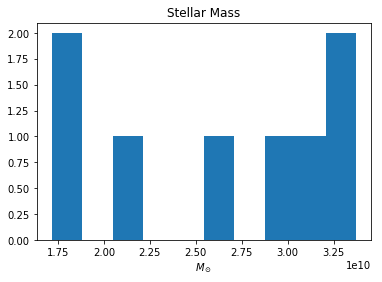

In [34]:
plt.hist(mass)
plt.title('Stellar Mass')
plt.xlabel('$M_\odot$')
plt.show()

look into gal.topleafid in subhalo table